In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Чтение файла

In [7]:
with h5py.File('train/2021-01-train.hdf5', mode='r') as dataset:
    print(list(dataset.keys())[:10])

['1609459200', '1609459800', '1609460400', '1609461000', '1609461600', '1609462200', '1609462800', '1609463400', '1609464000', '1609464600']


In [8]:
with h5py.File('train/2021-01-train.hdf5', mode='r') as dataset:
    print(list(dataset['1609459200'].keys()))

['events', 'intensity', 'radial_velocity', 'reflectivity']


In [10]:
with h5py.File('train/2021-01-train.hdf5', mode='r') as dataset:
    print(f"events shape: {dataset['1609459200']['events'].shape}")
    print(f"intensity shape: {dataset['1609459200']['intensity'].shape}")
    print(f"radial_velocity shape: {dataset['1609459200']['radial_velocity'].shape}")
    print(f"reflectivity shape: {dataset['1609459200']['reflectivity'].shape}")

events shape: (252, 252)
intensity shape: (252, 252)
radial_velocity shape: (10, 252, 252)
reflectivity shape: (10, 252, 252)


# Визуализация

In [15]:
events = []
intensity = []
radial_velocity = []
reflectivity = []

with h5py.File('train/2021-01-train.hdf5', mode='r') as dataset:
    timestamps = sorted(dataset.keys())[:6]
    for timestamp in timestamps:
        events.append(np.array(dataset[timestamp]['events']))
        intensity.append(np.array(dataset[timestamp]['intensity']))
        radial_velocity.append(np.array(dataset[timestamp]['radial_velocity']))
        reflectivity.append(np.array(dataset[timestamp]['reflectivity']))

events = np.array(events)
intensity = np.array(intensity)
radial_velocity = np.array(radial_velocity)
reflectivity = np.array(reflectivity)

events[events == -2e6] = -2
events[events == -1e6] = -1
intensity[intensity == -2e6] = -2
intensity[intensity == -1e6] = -1
radial_velocity[radial_velocity == -2e6] = -2
radial_velocity[radial_velocity == -1e6] = -1
reflectivity[reflectivity == -2e6] = -2
reflectivity[reflectivity == -1e6] = -1

## Погодные события

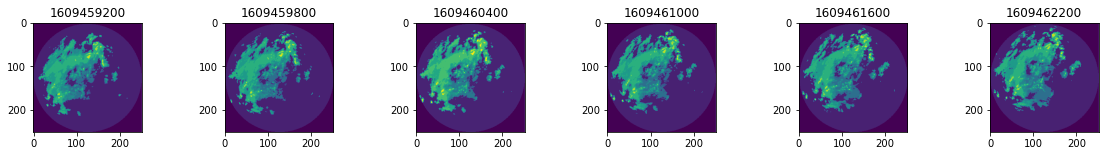

In [20]:
_, axs = plt.subplots(1, len(events), figsize=(20, 2))
for index in range(len(events)):
    axs[index].imshow(events[index])
    axs[index].set_title(timestamps[index])

## Интенсивность осадков

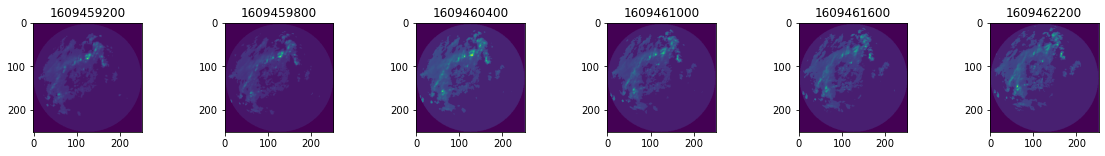

In [21]:
_, axs = plt.subplots(1, len(intensity), figsize=(20, 2))
for index in range(len(intensity)):
    axs[index].imshow(intensity[index])
    axs[index].set_title(timestamps[index])

## Радиальная скорость по высотам

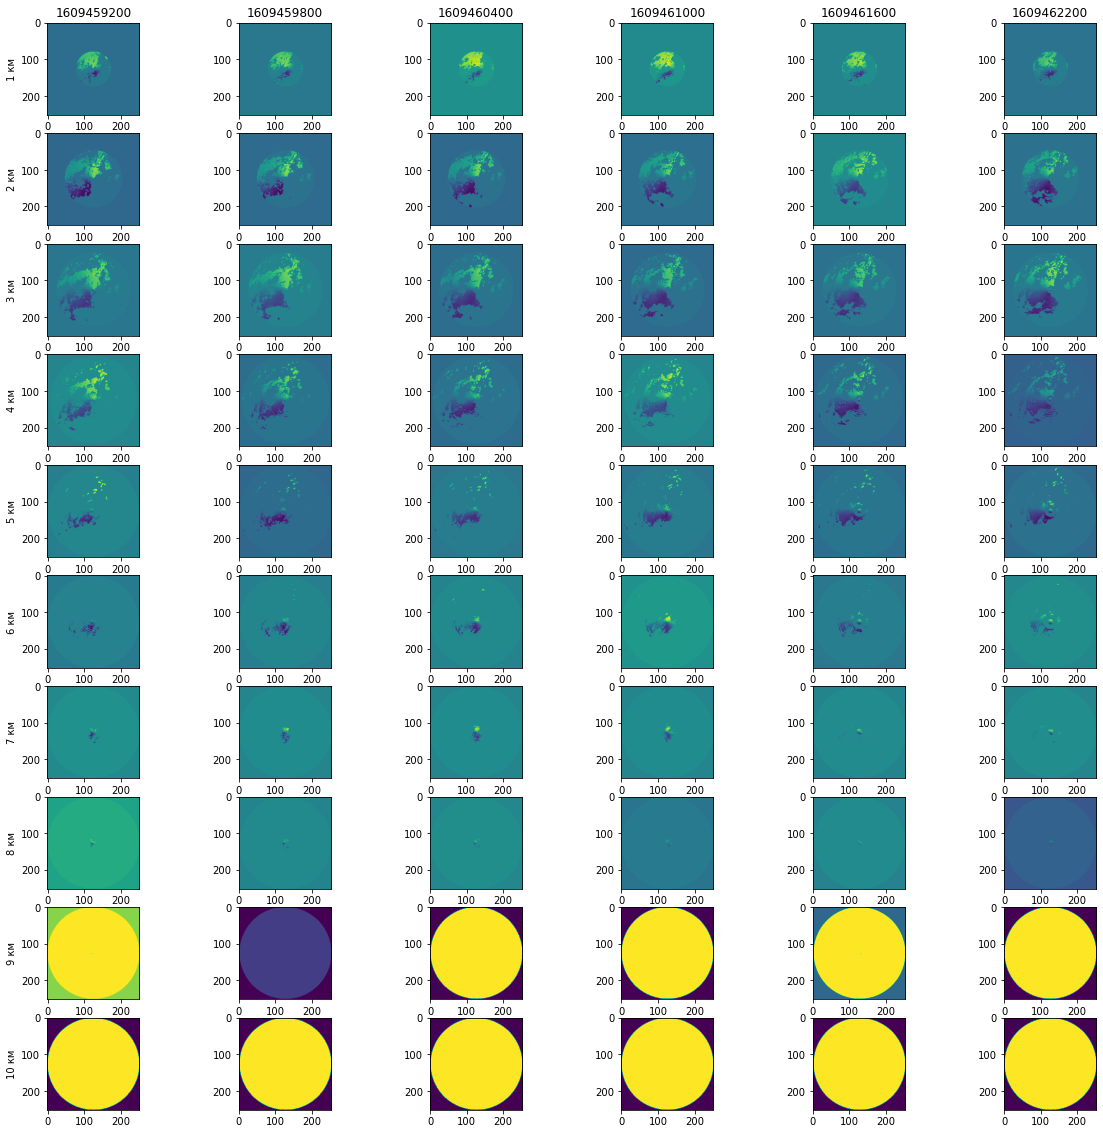

In [26]:
_, axs = plt.subplots(10, len(radial_velocity), figsize=(20, 20))
for index in range(len(radial_velocity)):
    for row in range(10):
        if index == 0:
            axs[row, index].set_ylabel(f'{row + 1} км')
        axs[row, index].imshow(radial_velocity[index, row])
    axs[0, index].set_title(timestamps[index])

## Отражаемость по высотам

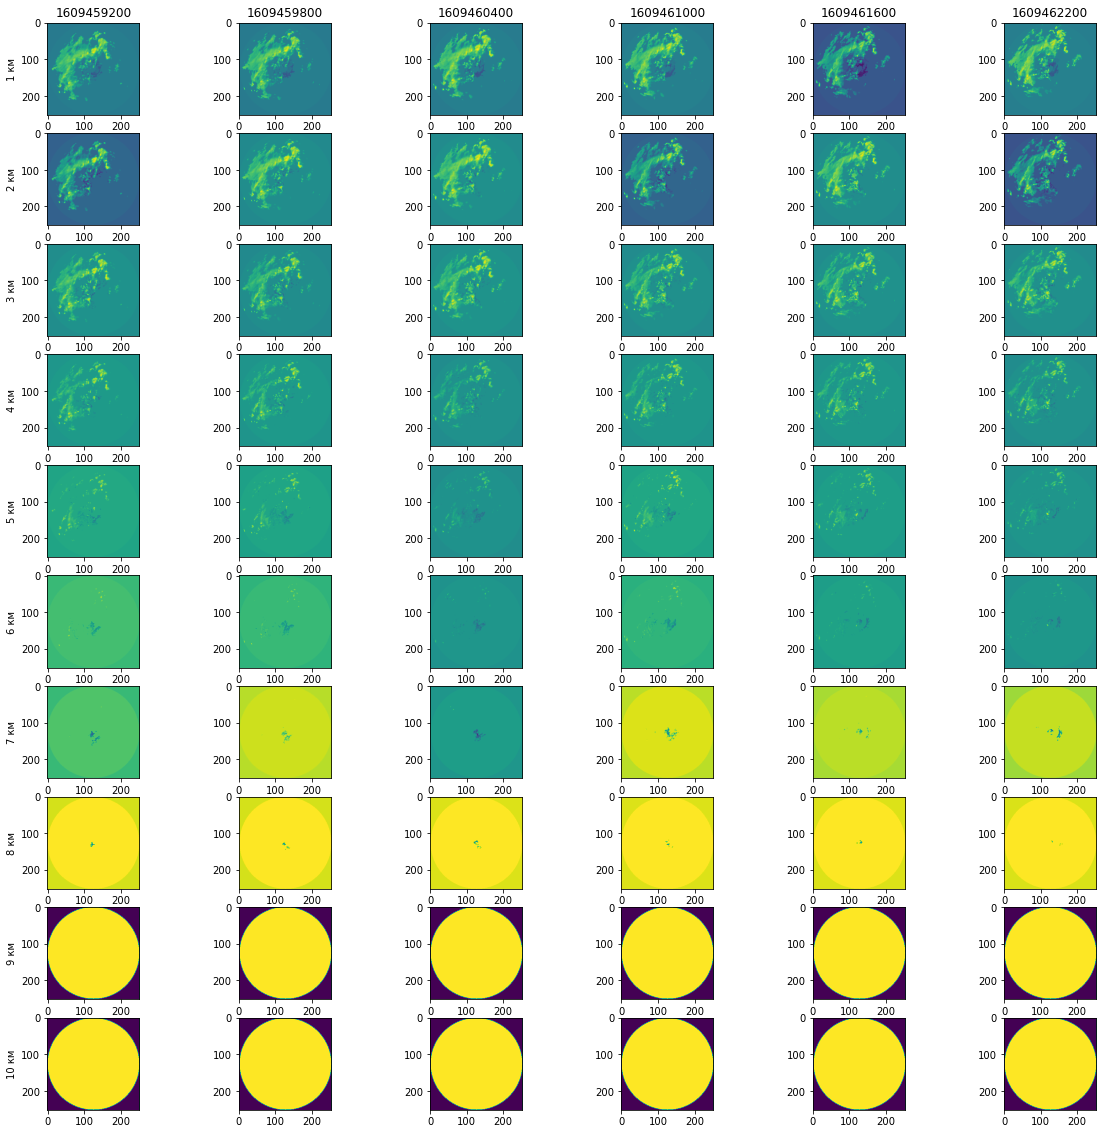

In [25]:
_, axs = plt.subplots(10, len(reflectivity), figsize=(20, 20))
for index in range(len(reflectivity)):
    for row in range(10):
        if index == 0:
            axs[row, index].set_ylabel(f'{row + 1} км')
        axs[row, index].imshow(reflectivity[index, row])
    axs[0, index].set_title(timestamps[index])